# Projeto de AI (Parte 2)

## Feito pela equipa "Ice Cold Pythons":
### 1. Diogo Araújo - a21905661 
### 2. Claudio Caetano - a21902813

## How to check if model is correct:

### R^2
R^2 tells us how much the predicted data explains the actual data. In other words, it represents the strength of the fit. However, it does not say anything about the model itself — it does not tell you if the model is good, whether the data you’ve chosen is biased, or even if you’ve chosen the correct modelling method. <br>

The R² value ranges from 0 to 1, with higher values denoting a strong fit, and lower values denoting a weak fit. Anything below 0.5 is a bad fit, while anything above 0.8 is a good fit. <br>

Strength of fit means that, on average, your predicted values do not deviate much from your actual data. The examples below will illustrate this. <br>

### MAE (Mean Absolute Error)
The MAE is the sum of all the error magnitudes divided by the number of points, so essentially the average error. Therefore, the lower the MAE, the less error in your model. <br>

### Mean Squared Error (MSE)
The MSE is the sum of the squares of all errors divided by the number of points. Note that, since in each instance the error is actually squared, it cannot be directly compared to the MAE, because it will always be of a higher order. Thus, as with MAE, the lower the MSE, the less error in the model. <br>

### Root Mean Squared Error (RMSE)
RMSE is the square root of the MSE. This is in a way a more useful metric, and now since both MAE and RMSE have the same ‘order’ of error, they can be compared with each other. As with both MAE and MSE, lower MSAE → lower error. <br>

## Examples of Models (Code)
Testing multiple models to check which one works best with student dataset. <br>
In the final code the model we used was not one of these, however this did help during the search. <br>

### Linear Regression (OLS)

#Create model <br>
model = LinearRegression(positive = True) <br>

#Train the model using the training data <br>
model.fit(train_x, train_y) <br>

#Make predictions using the training data <br>
train_predictions = model.predict(test_x) <br>

### Ridge

#Create model <br>
model = Ridge(alpha = 6) <br>

### Lasso

#Create model <br>
model = Lasso(alpha = 0.05) <br>

### Huber Regression
Huber Regression doesnt check the outlier values (in this case the ones with G3 equal to 0) so its usage was extremely limited. <br> 

#Create model <br>
model = HuberRegressor() <br>

## Additional Functions
Created a few additional functions that were added to the project in hopes of making the end result better. <br>
Most of these were, however, not used in the final code. <br>

### Outlier Removal
Removed all the outlier values, in this case the ones where G3 equals 0, from the dataframe. <br>

In [1]:
def outlier_removal(dataframe): 
    #Remove all columns where grade is 0 
    dataframe = dataframe[dataframe["G3"] != 0]
    
    #Return removed dataframe
    return dataframe

### Label Encoding
No need for label encoding as all features in this dataframe are numerical in value. <br>

One hot encoding has already been used in the datasets given by the teachers, therefore Feature Engineering is useless in this case. <br>

### Feature Selection
Select the best dataset values (lines), from the dataset, to train. <br>
This was never fully implemented as initial tests showed that this was simply a bad idea. <br>

In [2]:
def feature_selection(x): 
    #learn relationship from training data 
    X_new = SelectKBest(chi2, k = 2)

    #Transform fit 
    fit_transform(x, y)

    #Transform test input data
    test_x_fs = f_selector.transform(test_x) 

    return train_x_fs, test_x_fs, submit_x_fs

### Correlation
Get the correlation between the dataset columns to the column we are trying to predict, aka G3. <br>
Also used to get the features that are most correlated to the column we are trying to predict, aka G3. <br>

In [3]:
def correlation(dataframe):
    #Correlation between data on dataframe
    correlation = dataframe.corr()
    
    #Show values based on G3 (of correlation)
    display(correlation["G3"].sort_values())
    
def get_features(dataframe):
    #Find correlations with G3
    correlation = dataframe.corr()
    
    #Get most correlated features
    features = correlation.abs()['G3'].sort_values(ascending=False)

    #Get most correlated features
    features = features[:13]
    
    #Turn features into array
    features = features.index.values
    
    #Remove G3 from features
    features = np.delete(features, 0)
    
    #Return features
    return features

### Plotting (Data Analysis)
Created a few functions to use during data analysis, be it of the dataframe or of its columns. <br>

In [19]:
#Check G3 values
def grade_visualization(dataframe):
    #Describe grade
    print("Checking grade values (G3)")
    display(dataframe['G3'].describe())
    
    #Show distribution of grade
    plot = sns.countplot(dataframe['G3'])
    plot.axes.set_title("Distribution of G3 (Grade)")
    plot.set_xlabel("G3 (Grade)")
    plot.set_ylabel("Student Count")
    plt.show()
    
#Plot variable when compared to dataframe
def plot_variable(dataframe, x_values, y_values, plot_variable):
    # Plot the dataset
    plt.scatter(x = plot_variable, y = "G3", data = dataframe, color='black', s=100)

    # Plot the line
    plt.plot(x_values[plot_variable], y_values, color='red', linewidth=1)

    # Label plot and set limits
    plt.ylabel("G3 (Grade)")
    plt.xlabel(plot_variable)
    plt.ylim(0, 20)

    # Show the plot
    plt.show()
        
#New method of plotting variable when compared to G3
def plot_variable_diff(x_values, y_values, plot_variable):
    sns.lineplot(y = y_values, x = x_values[plot_variable])

### Backward Elimination
Gets the best columns to use to train the model. <br>

In [5]:
def backward_elimination(dataframe):
    columns_used = ['studytime', 'failures', 'Walc', 'school_GP', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'schoolsup_no',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 
       'nursery_no', 'nursery_yes', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']
    
    x = dataframe[columns_used]
    y = dataframe[["G3"]]
    
    #Significance value
    p_value = 0.05
    
    #Get model based on LinearRegression
    ols = sm.OLS(endog = y, exog = x).fit()

    #Get summary of fit
    display(ols.summary())
    display(ols)
    
#Run function in this tab
#backward_elimination(df_train)

### Feature Engineering
(Turns it back to before One-Hot encoding) <br>

As explained in the previous section of Label Encoding, feature engineering only makes it worse as we are bringing it to before One-Hot encoding was applied to the Dataframe. <br>

In [6]:
def feature_engineering(dataframe):
    #Sum columns
    dataframe["school"] = dataframe["school_GP"] * 0 + dataframe["school_MS"]
    dataframe["sex"] = dataframe["sex_F"] * 0 + dataframe["sex_M"]
    dataframe["address"] = dataframe["address_R"] * 0 + dataframe["address_U"]
    dataframe["famsize"] = dataframe["famsize_GT3"] * 0 + dataframe["famsize_LE3"]
    dataframe["Pstatus"] = dataframe["Pstatus_A"] * 0 + dataframe["Pstatus_T"]
    dataframe["Mjob"] = dataframe["Mjob_at_home"] * 0 + dataframe["Mjob_health"] + dataframe["Mjob_other"] * 2 + dataframe["Mjob_services"] * 3 + dataframe["Mjob_teacher"] * 4
    dataframe["Fjob"] = dataframe["Fjob_at_home"] * 0 + dataframe["Fjob_health"] + dataframe["Fjob_other"] * 2 + dataframe["Fjob_services"] * 3 + dataframe["Fjob_teacher"] * 4
    dataframe["reason"] = dataframe["reason_course"] * 0 + dataframe["reason_home"] + dataframe["reason_other"] * 2 + dataframe["reason_reputation"] * 3
    dataframe["guardian"] = dataframe["guardian_father"] * 0 + dataframe["guardian_mother"] + dataframe["guardian_other"] * 2
    dataframe["schoolsup"] = dataframe["schoolsup_no"] * 0 + dataframe["schoolsup_yes"]
    dataframe["famsup"] = dataframe["famsup_no"] * 0 + dataframe["famsup_yes"]
    dataframe["paid"] = dataframe["paid_no"] * 0 + dataframe["paid_yes"]
    dataframe["activities"] = dataframe["activities_no"] * 0 + dataframe["activities_yes"]
    dataframe["nursery"] = dataframe["nursery_no"] * 0 + dataframe["nursery_yes"]
    dataframe["higher"] = dataframe["higher_no"] * 0 + dataframe["higher_yes"]
    dataframe["internet"] = dataframe["internet_no"] * 0 + dataframe["internet_yes"]
    dataframe["romantic"] = dataframe["romantic_no"] * 0 + dataframe["romantic_yes"]

    #Delete columns
    del dataframe["school_GP"]
    del dataframe["school_MS"]
    del dataframe["sex_F"]
    del dataframe["sex_M"]
    del dataframe["address_R"]
    del dataframe["address_U"]
    del dataframe["famsize_GT3"]
    del dataframe["famsize_LE3"]
    del dataframe["Pstatus_A"]
    del dataframe["Pstatus_T"]
    del dataframe["Mjob_at_home"]
    del dataframe["Mjob_health"] 
    del dataframe["Mjob_other"] 
    del dataframe["Mjob_services"] 
    del dataframe["Mjob_teacher"]    
    del dataframe["Fjob_at_home"] 
    del dataframe["Fjob_health"] 
    del dataframe["Fjob_other"] 
    del dataframe["Fjob_services"] 
    del dataframe["Fjob_teacher"]
    del dataframe["reason_course"] 
    del dataframe["reason_home"] 
    del dataframe["reason_other"] 
    del dataframe["reason_reputation"]
    del dataframe["guardian_father"]
    del dataframe["guardian_mother"] 
    del dataframe["guardian_other"]
    del dataframe["schoolsup_no"] 
    del dataframe["schoolsup_yes"]
    del dataframe["famsup_no"] 
    del dataframe["famsup_yes"]
    del dataframe["paid_no"] 
    del dataframe["paid_yes"]
    del dataframe["activities_no"] 
    del dataframe["activities_yes"]
    del dataframe["nursery_no"] 
    del dataframe["nursery_yes"]
    del dataframe["higher_no"] 
    del dataframe["higher_yes"]
    del dataframe["internet_no"] 
    del dataframe["internet_yes"]
    del dataframe["romantic_no"] 
    del dataframe["romantic_yes"]
    
    #Return smaller dataframe
    return dataframe

## Solution
Final solution used to submit the predictions. <br>

### Import Libraries

In [32]:
#Import basic libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

#Import model libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#Used in Backward Elimination
import statsmodels.api as sm

### Get Dataset

In [33]:
#Get training dataframe from .csv file (for training and testing)
df_train = pd.read_csv('student_data.csv')

#Get submission dataframe from .csv file (for submission)
df_submit = pd.read_csv('test_data.csv')

### Data Analysis (Dataframe)

Checking grade values (G3)


count    545.000000
mean      11.939450
std        3.170696
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       18.000000
Name: G3, dtype: float64

C:\Users\diodo\anaconda3\envs\ai_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


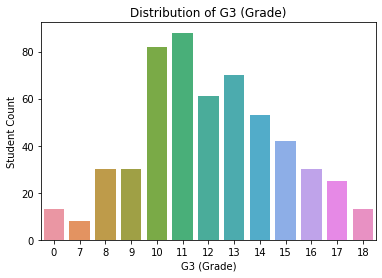

In [34]:
#Show data visualization comparing to G3 column
grade_visualization(df_train)

### Training and Testing values

In [35]:
#Get columns we will be using for filter (based on backward elimination)
columns_used = ["failures", "absences", "Medu", "Fedu", "traveltime", "Dalc", "sex_F",
               "address_R", "famsize_LE3", "Pstatus_T", "famsup_yes", "paid_yes"]

#Load training data
x = df_train[columns_used]
y = df_train[["G3"]]

#Apply feature selection to data
#x = feature_selection(x)

#Load training and testing variables
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.30, random_state = 105)

#Use to check for outliers
#display(x.loc[x['index'] == 0])

#Load submission data (x)
submit_x = df_submit[columns_used]

### Model 

In [36]:
#Create model
model = RandomForestRegressor(n_estimators = 280, max_features = "sqrt", max_depth = 7, random_state = 18)

#Train the model using the training data
model.fit(train_x, np.ravel(train_y))

#Make predictions using the x data
train_predictions = model.predict(test_x)

#Metrics to evaluate model
print("MAE: ", mean_absolute_error(test_y, train_predictions))
print("RMSE: ", mean_squared_error(test_y, train_predictions, squared = False))
print("R^2: ", r2_score(test_y, train_predictions))

MAE:  1.9117938808640504
RMSE:  2.5626502157903226
R^2:  0.3717248265897213


### Data Analysis (Columns)

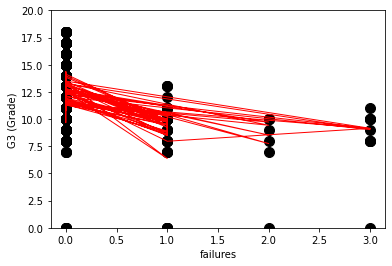

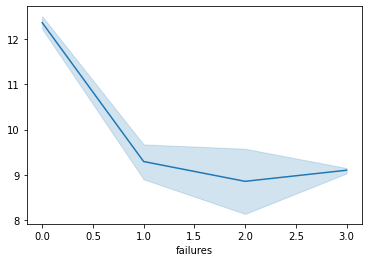

In [37]:
#Plot analysis between G3 and Failures 
plot_variable(df_train, test_x, train_predictions, "failures")

#Other method of analysis
plot_variable_diff(test_x, train_predictions, "failures")

### Submission

In [38]:
#Make predictions using the submission data
predictions = model.predict(submit_x)

#Create dataframe for submission
rows = [[i, float(predictions[i])] for i in range(0, predictions.size)]
submission = pd.DataFrame(rows, columns=["index", "G3"])

#Display submission dataframe
display(submission)

#Pass dataframe to .csv for submission in kaggle
submission.to_csv('submission.csv', index=False)

,index,G3
0,0,11.672692
1,1,12.921231
2,2,9.101936
3,3,11.945157
4,4,12.142876
...,...,...
99,99,8.715681
100,100,7.326093
101,101,11.787021
102,102,11.950332
